### This script can be manipulated by selecting a different emotion to plot facial data from. Only "true" values are plotted. Emotions to choose from:

affirmative, conditional, doubt_question, emphasis, negative, relative, topics, wh_question, yn question

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib
from IPython.display import HTML
from celluloid import Camera


In [4]:
# select emotion
emotion = "emphasis" 

# read in data file
df = pd.read_csv(f"grammatical_facial_expression/b_{emotion}_datapoints.txt",delimiter = " ",)
df_target = pd.read_csv(f"grammatical_facial_expression/b_{emotion}_targets.txt",delimiter = " ",)

In [5]:
# combine both df's
df['target'] = df_target

# select only TRUE values
truth = df[df['target']==1]

In [6]:
# collect x,y, & z coordinates as separate dataframes
xs = truth[truth.columns[1::3]]
ys = truth[truth.columns[2::3]]
zs = truth[truth.columns[3::3]]

# remove target col
xs = xs.drop(['target'],axis=1)

### Visualize  facial data.

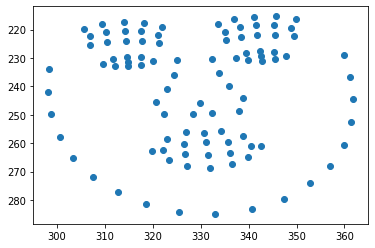

In [7]:
plt.scatter(xs.iloc[0],ys.iloc[0])
plt.gca().invert_yaxis()
plt.show()

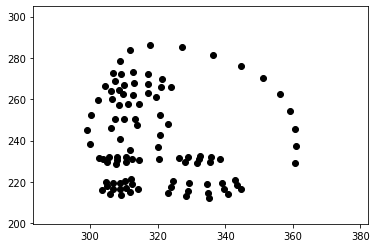

In [8]:
# Create animation of facial expressions to emulate video capture
camera = Camera(plt.figure())
for i in range(500):
    plt.scatter(xs.iloc[i],ys.iloc[i],c="black")
    plt.gca().invert_yaxis()
    camera.snap()
    
anim = camera.animate(blit=True)
HTML(anim.to_html5_video())